In [1]:
from google.colab import files

# Upload kaggle.json
print("Please upload your kaggle.json file:")
files.upload()

# Make a directory for Kaggle and move the token there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle API token uploaded and configured.")

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
Kaggle API token uploaded and configured.


In [2]:
!pip install kaggle

In [3]:
!kaggle datasets download -d mahdieizadpanah/birjand-university-mobile-palmprint-databasebmpd

Dataset URL: https://www.kaggle.com/datasets/mahdieizadpanah/birjand-university-mobile-palmprint-databasebmpd
License(s): unknown
 99% 1.64G/1.67G [00:13<00:00, 238MB/s]
100% 1.67G/1.67G [00:13<00:00, 132MB/s]


In [4]:
import zipfile
import os

zip_file_name = 'birjand-university-mobile-palmprint-databasebmpd.zip'
extracted_folder_name = 'BMPD_Dataset' # You can choose any name for the extracted folder

if os.path.exists(zip_file_name):
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall(extracted_folder_name)
    print(f"Dataset unzipped to '{extracted_folder_name}'")
else:
    print(f"Error: {zip_file_name} not found. Make sure the download was successful.")

# List the contents to verify
print("Contents of the extracted folder:")
!ls -F {extracted_folder_name}

Dataset unzipped to 'BMPD_Dataset'
Contents of the extracted folder:
'Birjand University Mobile Palmprint Database (BMPD)'/


In [5]:
import os

extracted_folder_name = 'BMPD_Dataset' # Make sure this matches your extraction folder name

if os.path.exists(extracted_folder_name):
    print(f"Contents of '{extracted_folder_name}':")
    # This command lists all files and directories recursively
    !ls -R {extracted_folder_name}
else:
    print(f"Error: The folder '{extracted_folder_name}' does not exist.")
    print("Please check if the dataset was unzipped successfully and the folder name is correct.")

Contents of 'BMPD_Dataset':
BMPD_Dataset:
'Birjand University Mobile Palmprint Database (BMPD)'

'BMPD_Dataset/Birjand University Mobile Palmprint Database (BMPD)':
001  004  007  010  013  016  019  022	025  028  031  034  037  040
002  005  008  011  014  017  020  023	026  029  032  035  038  041
003  006  009  012  015  018  021  024	027  030  033  036  039

'BMPD_Dataset/Birjand University Mobile Palmprint Database (BMPD)/001':
001_F_L_30.JPG	001_F_L_38.JPG	001_F_R_6.JPG	001_S_L_24.JPG	001_S_R_12.JPG
001_F_L_31.JPG	001_F_L_39.JPG	001_F_R_7.JPG	001_S_L_25.JPG	001_S_R_13.JPG
001_F_L_32.JPG	001_F_R_0.JPG	001_F_R_8.JPG	001_S_L_26.JPG	001_S_R_14.JPG
001_F_L_33.JPG	001_F_R_1.JPG	001_F_R_9.JPG	001_S_L_27.JPG	001_S_R_15.JPG
001_F_L_34.JPG	001_F_R_2.JPG	001_S_L_20.JPG	001_S_L_28.JPG	001_S_R_16.JPG
001_F_L_35.JPG	001_F_R_3.JPG	001_S_L_21.JPG	001_S_L_29.JPG	001_S_R_17.JPG
001_F_L_36.JPG	001_F_R_4.JPG	001_S_L_22.JPG	001_S_R_10.JPG	001_S_R_18.JPG
001_F_L_37.JPG	001_F_R_5.JPG	001_S_L_23.JPG	001

Found 1612 images.


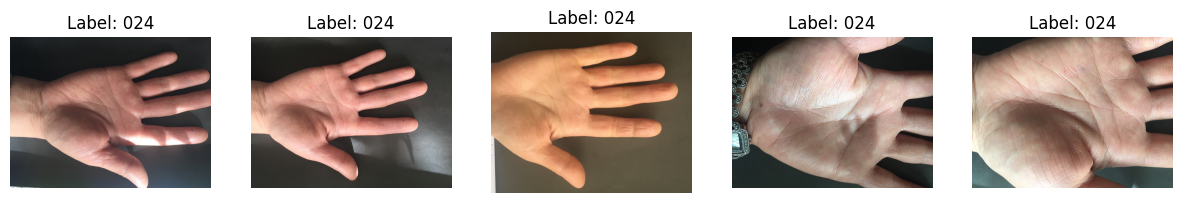

In [6]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# --- CORRECTED PATH based on your `ls -R` output ---
# The parent folder of 001, 002, etc., is the one with the long name.
# You need to join 'BMPD_Dataset' with this long folder name.
data_dir = os.path.join('BMPD_Dataset', 'Birjand University Mobile Palmprint Database (BMPD)')

image_paths = []
labels = []

# Ensure the data_dir exists before proceeding
if not os.path.exists(data_dir):
    print(f"Error: The specified data directory '{data_dir}' does not exist. Please correct the path.")
else:
    # Iterate through all files in the data_dir and its subdirectories
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            # All your image files are .JPG, so let's explicitly check for that
            if file.lower().endswith('.jpg'):
                image_path = os.path.join(root, file)
                image_paths.append(image_path)

                # --- Labeling Logic ---
                # The label (subject ID) is the name of the immediate parent folder (e.g., '001', '002').
                # os.path.basename(root) will correctly extract '001', '002', etc.
                label = os.path.basename(root)
                labels.append(label)

    print(f"Found {len(image_paths)} images.")

    if len(image_paths) > 0:
        # Example: Load and display a few images
        num_images_to_show = min(5, len(image_paths))
        plt.figure(figsize=(15, 5))
        for i in range(num_images_to_show):
            img_path = image_paths[i]
            img = cv2.imread(img_path)
            if img is not None:
                # OpenCV loads images in BGR, matplotlib expects RGB
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                plt.subplot(1, num_images_to_show, i + 1)
                plt.imshow(img_rgb)
                plt.title(f"Label: {labels[i]}")
                plt.axis('off')
            else:
                print(f"Warning: Could not load image {img_path}")
        plt.show()
    else:
        print("No images found in the specified directory. Check file extensions or deeper nesting.")

# **Exploratory Data Analysis**

## **Dataset Structure & Image Basics**

### **Count images per subject (user/class)**

<ipython-input-13-2bcc38d0d013>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-13-2bcc38d0d013>:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



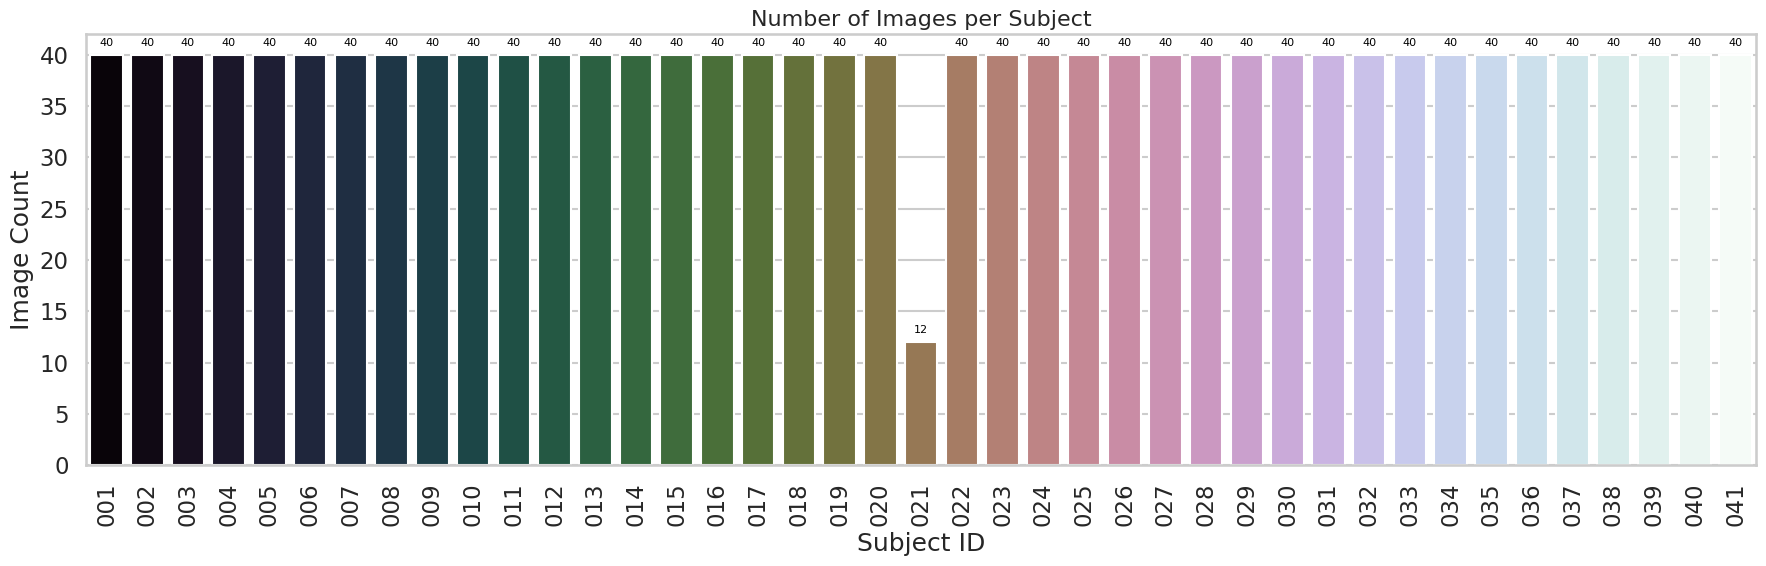

In [13]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Style
sns.set(style="whitegrid", context="talk")

# Count labels
label_counts = Counter(labels)
df_labels = pd.DataFrame(label_counts.items(), columns=['Subject ID', 'Image Count']).sort_values('Subject ID')

# Plot
plt.figure(figsize=(18, 6))
barplot = sns.barplot(
    x='Subject ID',
    y='Image Count',
    data=df_labels,
    palette='cubehelix'
)

# Rotate x-labels and add value labels on top
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        barplot.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                         textcoords='offset points')

# Titles and labels
plt.title('Number of Images per Subject', fontsize=16)
plt.xlabel('Subject ID')
plt.ylabel('Image Count')
plt.tight_layout()
plt.show()

### **Plot distribution of image dimensions (width & height separately)**

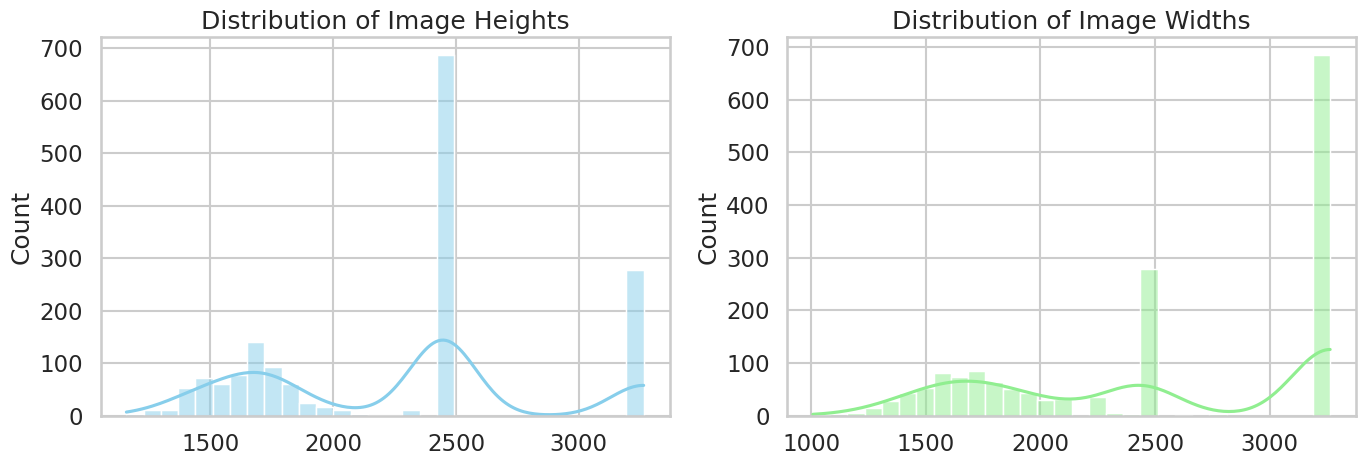

In [14]:
image_shapes = [cv2.imread(path).shape[:2] for path in image_paths if cv2.imread(path) is not None]
heights, widths = zip(*image_shapes)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(heights, kde=True, bins=30, color='skyblue')
plt.title("Distribution of Image Heights")

plt.subplot(1, 2, 2)
sns.histplot(widths, kde=True, bins=30, color='lightgreen')
plt.title("Distribution of Image Widths")

plt.tight_layout()
plt.show()

### **Visualize a sample image grid per class**

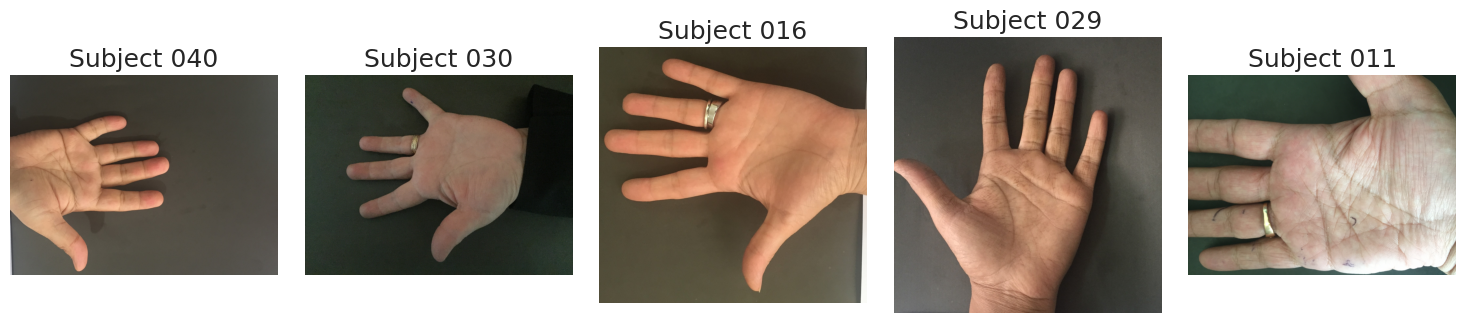

In [15]:
import random

unique_labels = list(set(labels))
sample_labels = random.sample(unique_labels, 5)  # Pick 5 random classes
plt.figure(figsize=(15, 10))

for i, label in enumerate(sample_labels):
    sample_imgs = [p for p, l in zip(image_paths, labels) if l == label][:1]  # first image per label
    for img_path in sample_imgs:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f"Subject {label}")
        plt.axis('off')

plt.tight_layout()
plt.show()

### **Check for corrupted files**

In [16]:
import cv2
import os

corrupted_files = []

for path in image_paths:
    img = cv2.imread(path)
    if img is None:
        corrupted_files.append(path)

# Report
if corrupted_files:
    print(f"Found {len(corrupted_files)} corrupted images:")
    for file in corrupted_files:
        print(file)
else:
    print("✅ No corrupted images found.")

✅ No corrupted images found.
